# Data Prep Demo

The code contained below is the code that I put together to just quickly examine the nature of this data, change the formatting of the column headers, and save out the 2018 data separately from the rest.

Notes are provided so that you can refer back to this as you're completing the guided lab. You should feel confident to complete these steps and much more by the end of this 3 lesson series.

#### Import modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### Import data

In [2]:
df = pd.read_csv('../data/City_Budget_and_Expenditures.csv')

#### Preview data

In [3]:
df.head()

,BUDGET FISCAL YEAR,DEPARTMENT NAME,FUND NAME,ACCOUNT NAME,ADOPTED BUDGET AMOUNT,TOTAL EXPENDITURES,BUDGET CHANGE AMOUNT,BUDGET TRANSFER IN AMOUNT,BUDGET TRANSFER OUT AMOUNT,TOTAL BUDGET,ENCUMBRANCE AMOUNT,PRE-ENCUMBRANCE AMOUNT,BUDGET UNCOMMITTED AMOUNT,ACCOUNT GROUP NAME,FUND,ACCOUNT,DEPARTMENT
0,2019,AGING,GENERAL FUND (GENERAL BUDGET),CONTRACTUAL SERVICES,2185782.0,750988.85,2000.0,0.0,413400.0,1774382.0,522198.0,0.0,467277.15,EXPENSES,100,003040,2
1,2019,AGING,HEALTH INS COUNS ADV (HICAP),FINANCIAL ALIGNMENT - NEW,0.0,NaN,66184.0,0.0,0.0,66184.0,66184.0,0.0,0.00,NaN,47Y,02RDD3,2
2,2019,AGING,OTHER PROGRAMS FOR THE AGING,ENROLLEE WAGES,0.0,1073105.46,1601346.0,0.0,0.0,1601346.0,0.0,0.0,528240.54,NaN,410,021021,2
3,2019,AGING,SENIOR CITYRIDE PROGRAM FUND,CITYRIDE PROGRAM,0.0,1709925.00,3708000.0,0.0,0.0,3708000.0,1961240.0,0.0,0.00,NaN,599,02R220,2
4,2019,AGING,GENERAL FUND (GENERAL BUDGET),OVERTIME GENERAL,3900.0,319.28,0.0,0.0,0.0,3900.0,0.0,0.0,3580.72,SALARIES AND BENEFITS,100,001090,2


#### Check number of rows and columns

In [4]:
df.shape

(27645, 17)

#### Look at counts for each year

In [5]:
df['BUDGET FISCAL YEAR'].value_counts()

2013    3883
2018    3653
2017    3593
2015    3477
2016    3426
2012    3271
2014    3267
2019    3075
Name: BUDGET FISCAL YEAR, dtype: int64

#### Examine all column names

In [6]:
df.columns

Index(['BUDGET FISCAL YEAR', 'DEPARTMENT NAME', 'FUND NAME', 'ACCOUNT NAME',
       'ADOPTED BUDGET AMOUNT', 'TOTAL EXPENDITURES', 'BUDGET CHANGE AMOUNT',
       'BUDGET TRANSFER IN AMOUNT', 'BUDGET TRANSFER OUT AMOUNT',
       'TOTAL BUDGET', 'ENCUMBRANCE AMOUNT', 'PRE-ENCUMBRANCE AMOUNT',
       'BUDGET UNCOMMITTED AMOUNT', 'ACCOUNT GROUP NAME', 'FUND', 'ACCOUNT',
       'DEPARTMENT'],
      dtype='object')

#### Reformat column names
We replace both spaces and hypens with underscore and make all text lowercase.

In [7]:
df.columns = ['_'.join(x.replace('-', '_').lower().split()) for x in df.columns]

#### Make a couple of quick plots
Just to get an idea of what the data contains and what we might want to look at.

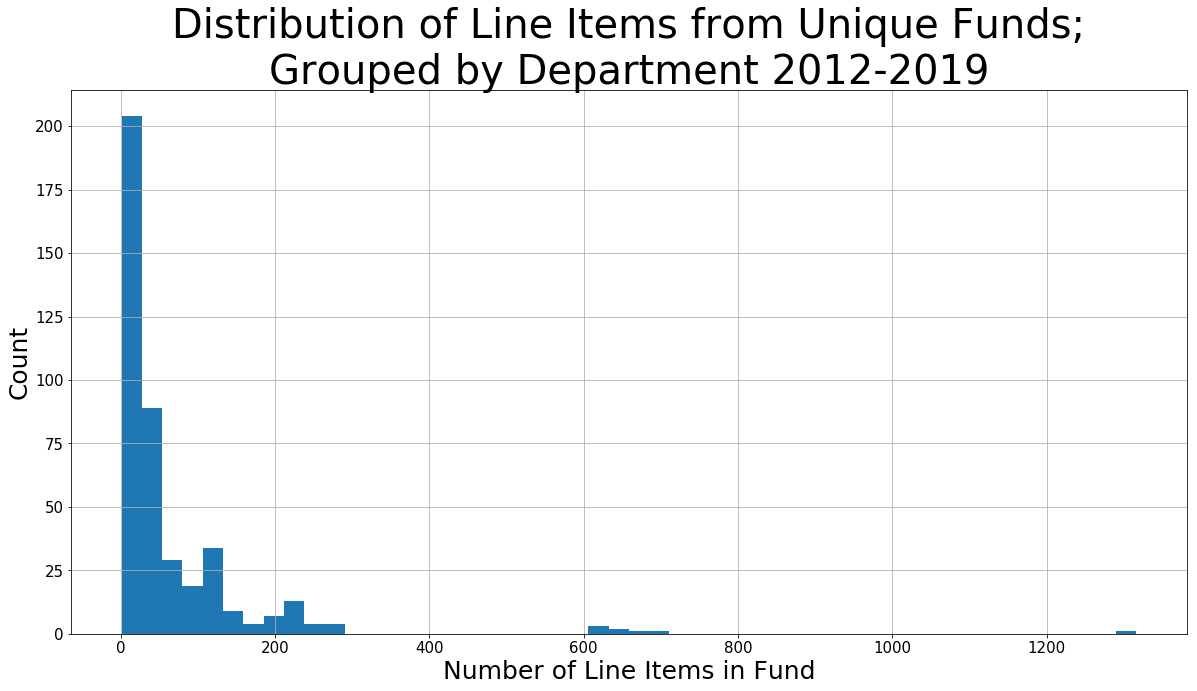

In [8]:
df.groupby(['budget_fiscal_year', 'department_name'])[['fund_name']].count().hist(bins=50, figsize=(20,10))
plt.title('Distribution of Line Items from Unique Funds;\nGrouped by Department 2012-2019', fontsize=40)
plt.xlabel('Number of Line Items in Fund', fontsize=25)
plt.ylabel('Count', fontsize=25)
plt.tick_params(labelsize=15)

This plot groups our data by department and year and counts the unique occurence of line items from each fund. While most of our counts are below 100 (and almost all below 300), we can see here that there are several over 600 and as high as around 1300.

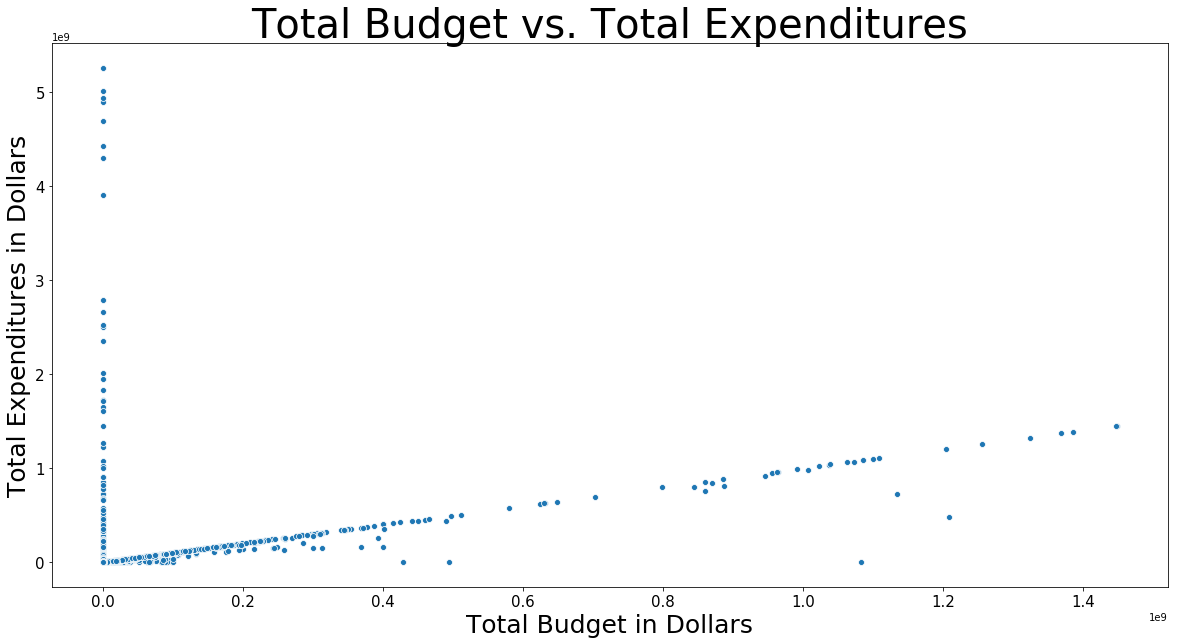

In [9]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='total_budget', y='total_expenditures', data=df)
plt.title('Total Budget vs. Total Expenditures', fontsize=40)
plt.xlabel('Total Budget in Dollars', fontsize=25)
plt.ylabel('Total Expenditures in Dollars', fontsize=25)
plt.tick_params(labelsize=15)

While it appears that expenditures generally tended to approximate the total budget, we see a number of expenditures without any allocated budget (and a few instances where expenditures were much lower than the budgeted amount).

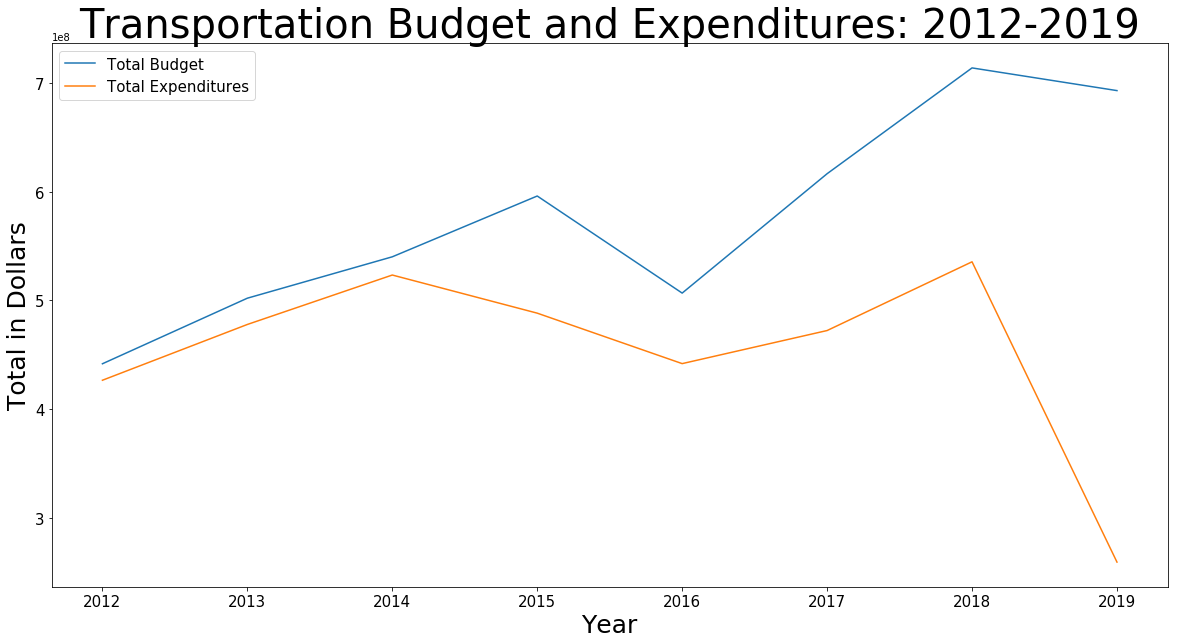

In [10]:
df[df.department_name=='TRANSPORTATION'].groupby('budget_fiscal_year')[['total_budget', 'total_expenditures']].sum().plot(figsize=(20,10))
plt.title('Transportation Budget and Expenditures: 2012-2019', fontsize=40)
plt.xlabel('Year', fontsize=25)
plt.ylabel('Total in Dollars', fontsize=25)
plt.tick_params(labelsize=15)
plt.legend(['Total Budget', 'Total Expenditures'], fontsize=15)

It appears that Transportation consistently has a higher budget than expenditures. The widening gap in these expenditures is worth investigating, although the 2019 data expectedly low given how early in the year this data was sourced.

#### We'll save out just the 2018 data for our first lesson

In [11]:
df[df['budget_fiscal_year']==2018].to_csv('../data/2018_budget.csv', index=False)